### Testing out the Chi-Squared test


We need some libraries to process this data. They are:

In [24]:
import json
from matplotlib import pyplot as plt
import datetime as dt
import pandas as pd

##### Remember, you only need to load in one file. The two examples using `dlikes` and `elikes` are to show the two different data structures you may have received from Instagram

In [25]:
with open(r'D:\EMAT_22110\FB Data Silva\technogecko_20200714\likes.json') as a:
    likes = json.load(a)
with open(r'D:\EMAT_22110\liked_posts.json') as k:
    elikes = json.load(k)
print(likes.keys())
print(elikes.keys())

dict_keys(['media_likes', 'comment_likes'])
dict_keys(['likes_media_likes'])


In [26]:
dlikes_df = pd.DataFrame(likes['media_likes'], columns = ['timestamp', 'account'])
dlikes_df.head()

,timestamp,account
0,2020-07-11T04:39:28+00:00,ball_doesnt_lie
1,2020-07-11T04:39:05+00:00,ball_doesnt_lie
2,2020-07-05T17:25:44+00:00,ali_saurusrex
3,2020-07-03T03:40:02+00:00,cacandassociates
4,2020-06-25T17:41:50+00:00,cacandassociates


In [27]:
accounts = [x['title'] for x in elikes['likes_media_likes']]
timestamp = [x['string_list_data'][0]['timestamp'] for x in elikes['likes_media_likes']]
elikes_df = pd.DataFrame({'accounts' : accounts, 'timestamp' : timestamp})
elikes_df.head()

,accounts,timestamp
0,iss,1423687921
1,iss,1423687906
2,iss,1423687904
3,iss,1423687901
4,smartcarusa,1423687877


In [28]:
count_dlikes = dlikes_df.groupby('account').count()
count_dlikes.head()

,timestamp
account,
a_matt_silva,18
ali_saurusrex,68
andrewtcurry,1
aroseroar16,29
athenalemon,1


In [29]:
count_elikes = elikes_df.groupby('accounts').count()
count_elikes.head()

,timestamp
accounts,
4hairfashion,24
4hairpleasure,28
5ideasaday,2
9gag,1
__brandonhudson__,1


In [30]:
import random

In [31]:
rand_dlikes = random.sample(list(count_dlikes.index), 10)
rand_dlikes

['jessicaajeean',
 'orangekoala2',
 'sp4zie',
 'slemdawgmillionaire',
 'aroseroar16',
 'kateblarson',
 'melissarohwer',
 'wrenchscienceusa',
 'jennjohnn',
 'holly.berry_22']

In [32]:
sample_dlikes = count_dlikes.loc[rand_dlikes]
sample_dlikes

,timestamp
account,
jessicaajeean,2
orangekoala2,27
sp4zie,1
slemdawgmillionaire,1
aroseroar16,29
kateblarson,2
melissarohwer,1
wrenchscienceusa,1
jennjohnn,3


In [33]:
from scipy import stats
import numpy as np

In [34]:
stats.chisquare(sample_dlikes['timestamp'])

Power_divergenceResult(statistic=166.1176470588235, pvalue=3.968995706472457e-31)

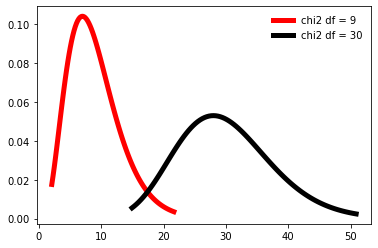

In [35]:
fig, ax1 = plt.subplots(1,1)
df1 = 9
x1 = np.linspace(stats.chi2.ppf(0.01, df1), stats.chi2.ppf(0.99, df1), 100)
ax1.plot(x1, stats.chi2.pdf(x1, df1), 'r-', lw = 5, label = 'chi2 df = 9')
df2 = 30
x2 = np.linspace(stats.chi2.ppf(0.01, df2), stats.chi2.ppf(0.99, df2), 100)
ax1.plot(x2, stats.chi2.pdf(x2, df2), 'k-', lw = 5, label = 'chi2 df = 30')
ax1.legend(loc = 'best', frameon = False)
plt.show()

In [36]:
stats.chisquare(f_obs = sample_dlikes['timestamp'], f_exp=[sample_dlikes['timestamp'].mean()] * 10)

Power_divergenceResult(statistic=166.1176470588235, pvalue=3.968995706472457e-31)

In [37]:
sample_dlikes['timestamp'].mean()

6.8

In [38]:
stats.chisquare(f_obs = sample_dlikes['timestamp'], f_exp = sample_dlikes['timestamp'])

Power_divergenceResult(statistic=0.0, pvalue=1.0)